In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [2]:
data = pd.read_csv("diabetic_data.csv")

In [3]:
data.shape

(101766, 50)

In [4]:
data.head(4)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [5]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
drop_cols = [
    'encounter_id', 'patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id','num_lab_procedures','num_procedures',
    'num_medications','number_outpatient','number_inpatient','max_glu_serum','A1Cresult','weight','medical_specialty','payer_code','number_emergency',
    'diag_1','diag_2','diag_3'
    
]
data = data.drop(columns=drop_cols)

In [7]:
data.shape

(101766, 31)

In [8]:
data.isnull().sum()

race                        0
gender                      0
age                         0
time_in_hospital            0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [9]:
import pandas as pd
# ✅ Save as CSV
csv_path = "preprocessed_diabetic_data.csv"
data.to_csv(csv_path, index=False)
print(f"💾 CSV file saved successfully at: {csv_path}")

💾 CSV file saved successfully at: preprocessed_diabetic_data.csv


In [10]:
# ✅ Save as Excel (.xlsx)
excel_path = "preprocessed_diabetic_data.xlsx"
data.to_excel(excel_path, index=False)
print(f"💾 Excel file saved successfully at: {excel_path}")

💾 Excel file saved successfully at: preprocessed_diabetic_data.xlsx


In [11]:
data.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [12]:
features = [
       'race', 'gender', 'age', 'time_in_hospital', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'
]
target = 'readmitted'

In [13]:
df = data[features + [target]]

In [14]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [15]:
df.head(5)

,race,gender,age,time_in_hospital,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,3,0,0,1,1,1,1,1,1,1,...,0,1,1,0,0,0,0,1,0,2
1,3,0,1,3,9,1,1,1,1,1,...,0,3,1,0,0,0,0,0,1,1
2,1,0,2,2,6,1,1,1,1,1,...,0,1,1,0,0,0,0,1,1,2
3,3,1,3,2,7,1,1,1,1,1,...,0,3,1,0,0,0,0,0,1,2
4,3,1,4,1,5,1,1,1,1,1,...,0,2,1,0,0,0,0,0,1,2


In [ ]:
X = df[features]
y = df[target]

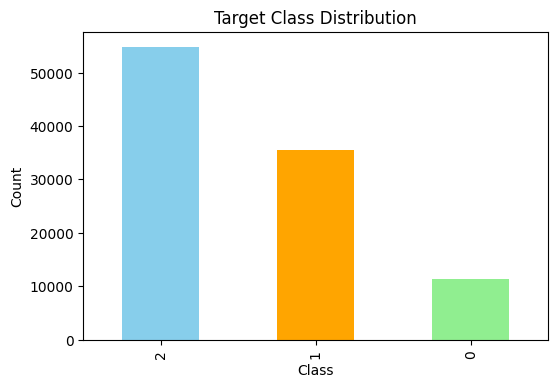

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the distribution
plt.figure(figsize=(6,4))
df['readmitted'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.407

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.33      0.19      2272
           1       0.39      0.35      0.37      7109
           2       0.59      0.46      0.52     10973

    accuracy                           0.41     20354
   macro avg       0.37      0.38      0.36     20354
weighted avg       0.47      0.41      0.43     20354


Confusion Matrix:
 [[ 743  749  780]
 [1924 2495 2690]
 [2758 3176 5039]]
